In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG', 'GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 200, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	72   	-909.952	55.3492	-1068.7	-811.283
1  	64   	-953.813	43.8278	-1069.24	-895.39 
2  	75   	-995.629	44.5431	-1071.04	-946.883
3  	92   	-1047.88	31.4267	-1072.37	-972.857
4  	85   	-1067.06	3.49929	-1072.57	-1059.61
5  	76   	-1070.27	0.891578	-1072.69	-1068.74
6  	62   	-1070.92	0.698837	-1072.69	-1069.61
7  	66   	-1071.48	0.58018 	-1072.82	-1070.6 
8  	69   	-1071.94	0.529502	-1073.14	-1071.12
9  	74   	-1072.42	0.320597	-1073.14	-1071.61
10 	69   	-1072.66	0.131019	-1073.14	-1072.46
11 	61   	-1072.73	0.115718	-1073.14	-1072.53
12 	76   	-1072.8 	0.0958387	-1073.14	-1072.65
13 	71   	-1072.83	0.0888668	-1073.14	-1072.71
14 	80   	-1072.87	0.0875763	-1073.14	-1072.74
15 	53   	-1072.89	0.0889222	-1073.14	-1072.76
16 	59   	-1072.91	0.0940613	-1073.14	-1072.79
17 	57   	-1072.96	0.0904587	-1073.14	-1072.83
18 	78   	-1073.01	0.0766246	-1073.16	-1072.87
19 	80   	-1073.05	0.0517924	-1073.16	-1072.96
20 	63   	-1073.07	0.0374265	-1073

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1073.1677063130178

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

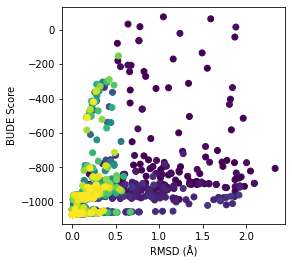

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Tri_dimer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	100  	-850.946	138.19	-1055.52	-100.285
1  	100  	-907.089	58.4821	-1057.04	-640.884
2  	100  	-926.973	44.3179	-1060.47	-803.071
3  	100  	-941.133	41.2487	-1061.81	-828.794
4  	100  	-955.262	43.8048	-1061.81	-892.582
5  	100  	-970.164	42.5269	-1064.73	-906.927
6  	100  	-985.331	43.6178	-1066.93	-908.481
7  	100  	-999.352	43.8756	-1066.93	-908.481
8  	100  	-1013.01	43.0649	-1067.61	-929.625
9  	100  	-1022.04	39.9748	-1067.96	-959.276
10 	100  	-1036.38	35.6293	-1068.59	-961.15 
11 	100  	-1049.33	27.2266	-1070.87	-961.15 
12 	100  	-1060.7 	10.6875	-1070.87	-986.22 
13 	100  	-1064   	3.97103	-1071.49	-1052.53
14 	100  	-1066.14	3.10145	-1071.49	-1057.21
15 	100  	-1067.4 	2.54005	-1071.62	-1057.21
16 	100  	-1068.52	1.74525	-1071.72	-1063.63
17 	100  	-1069.1 	1.66491	-1071.88	-1063.63
18 	100  	-1070.02	1.4258 	-1072.18	-1065.08
19 	100  	-1070.55	1.17105	-1072.69	-1066.93
20 	100  	-1070.96	0.915704	-1072.69	-1068.46
21 	100  	-

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1073.0141528265972

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

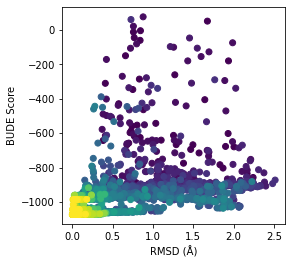

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Tri_dimer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-770.647	233.304	-1047.24	-24.4974
1  	89   	-763.627	248.784	-1029.46	-93.4235
2  	95   	-775.421	231.933	-1046.19	-88.6113
3  	97   	-836.814	169.694	-1062.92	-225.395
4  	93   	-786.602	231.391	-1060.12	307.205 
5  	93   	-819.692	220.866	-1057.84	307.205 
6  	96   	-752.255	246.378	-1056.74	14.4035 
7  	95   	-739.456	223.094	-1072.02	14.4035 
8  	96   	-832.576	155.409	-1065.27	-323.279
9  	95   	-832.594	156.641	-1066.33	-310.41 
10 	86   	-769.966	227.251	-1065.12	139.588 
11 	87   	-707.62 	274.743	-1043.21	372.951 
12 	97   	-725.087	228.089	-1062.18	372.951 
13 	85   	-775.932	252.204	-997.697	223.389 
14 	89   	-797.214	203.867	-1053.12	223.389 
15 	82   	-686.939	239.376	-1057.46	168.255 
16 	85   	-662.895	282.19 	-1061.91	168.255 
17 	93   	-807.085	216.723	-1065.17	-99.2045
18 	93   	-856.344	163.834	-1029.2 	-109.804
19 	94   	-806.853	212.535	-1042.79	-171.715
20 	84   	-803.091	209.746	-1061.95	-69.3514
21 	86   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1072.021777425131

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

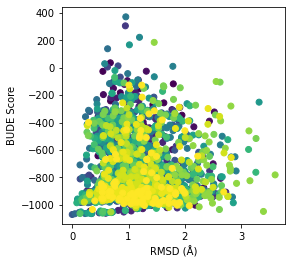

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Tri_dimer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-750.832	193.368	-1060.94	-309.384
1  	100  	-842.16 	133.828	-1065.12	-270.548
2  	100  	-914.527	96.3487	-1068.57	-400.591
3  	100  	-937.599	48.7559	-1064   	-782.361
4  	100  	-963.308	63.8642	-1071.52	-535.422
5  	100  	-917.01 	156.259	-1070.52	-402.351
6  	100  	-979.108	55.1934	-1069.04	-791.839
7  	100  	-1006.61	53.4342	-1070.48	-823.754
8  	100  	-1021.17	56.8102	-1070.79	-821.898
9  	100  	-1049.66	31.4564	-1072.81	-961.272
10 	100  	-1044.33	40.3095	-1071.84	-923.522
11 	100  	-1056.81	31.9913	-1072.71	-959.53 
12 	100  	-1049.73	39.1612	-1072.75	-957.961
13 	100  	-1060.65	28.18  	-1073   	-959.954
14 	100  	-1055.62	33.3274	-1073.07	-960.253
15 	100  	-1039.82	41.5333	-1073.01	-960.249
16 	100  	-1059.66	24.8497	-1072.98	-985.808
17 	100  	-1062.96	19.1582	-1073.1 	-985.716
18 	100  	-1063.91	18.0395	-1073.12	-986    
19 	100  	-1064.84	14.6544	-1073.12	-1015.13
20 	100  	-1067.74	11.745 	-1073.13	-1015.03
21 	100  	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1073.1944169629946

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

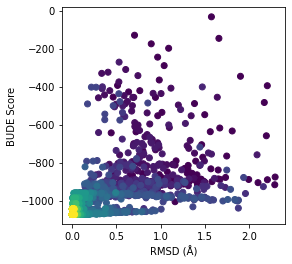

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Tri_dimer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)